### custom breakdown file for a model as a netcdf

    -air sea C flux
    -air sea SO flux
    -air sea export
    -air sea annual surface DIC
    -air sea annual S (surface)
    -the above two at 100m and for SO
    -run in a notebook format

Takes model names and plots

In [1]:
import matplotlib.pyplot as plt
import glob
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/WORK_SCRIPTS')
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
import scendict as sc
import breakdown as bp
import plotr as pr
from importlib import reload
reload(bp)

<module 'breakdown' from '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/WORK_SCRIPTS/breakdown.py'>

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [9]:

#------CHANGE THIS TO WHAT YOU WANT TO EXTRACT
extract = False #extracting?
graph = True #plotting?

In [17]:

sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/' #results directory
fnam = 'Cflx_comparison_1-3.png' ## filename for resulting plot
tms_te = ['TOM12_DW_WE43']

tms = ['TOM12_TJ_1ASA','TOM12_TJ_1BSA', 'TOM12_TJ_3ASA', 'TOM12_TJ_3BSA',\
          'TOM12_TJ_2ASA', 'TOM12_TJ_2BSA', 'TOM12_DW_WE43', 'TOM12_TJ_WE43', 'TOM12_DW_GA01']


#tms = ['TOM12_TJ_1ASA','TOM12_TJ_1BSA']#, 'TOM12_TJ_3ASA', 'TOM12_TJ_3BSA',\
      #  'TOM12_DW_WE43','TOM12_TJ_WE43', 'TOM12_DW_GA01'] ##models to plot
 ##models to extract

descs = ['1ASA: TJ(MET), Hist. ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '1BSA: TJ(MET), Hist. ozone, SSP 3-7.0, restart@ WE43(1948)',\
         '3ASA: TJ(MET), 1990 ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '3BSA: TJ(MET), 1990 ozone, SSP 3-7.0, restart@ WE43(1948)',\
         '2ASA: TJ(MET), 1990 ozone, SSP 1-2.6, restart@ WE43(1948)',\
         '2BSA: TJ(MET), 1990 ozone, SSP 3-7.0, restart@ WE43(1948)',\
         'DW_WE43: DW(ERA5), DW_WE43 with GOC limit OFF',\
         'TJ_WE43: TJ(ERA5), rerun of DW_WE43 with GOC limit ON',\
         'DW_GA01: DW(NCEP), GCB run, no GOC brakes'] 


cols = [sc.scen['1A']['color'],\
        sc.scen['1B']['color'],\
        sc.scen['3A']['color'],\
        sc.scen['3B']['color'],\
        sc.scen['2A']['color'],\
        sc.scen['2B']['color'],\
        'grey', 'k', 'b'] #colours for models in tm

linestyles = ['-','-','-','-','-','-','-',':','-']

In [18]:
reload(bp)
if extract: 
    for tm in tms_te:
        bp.breakdown_maker(tm, bdflag = 'cflx', resDir = sdir, fmi = 1948)



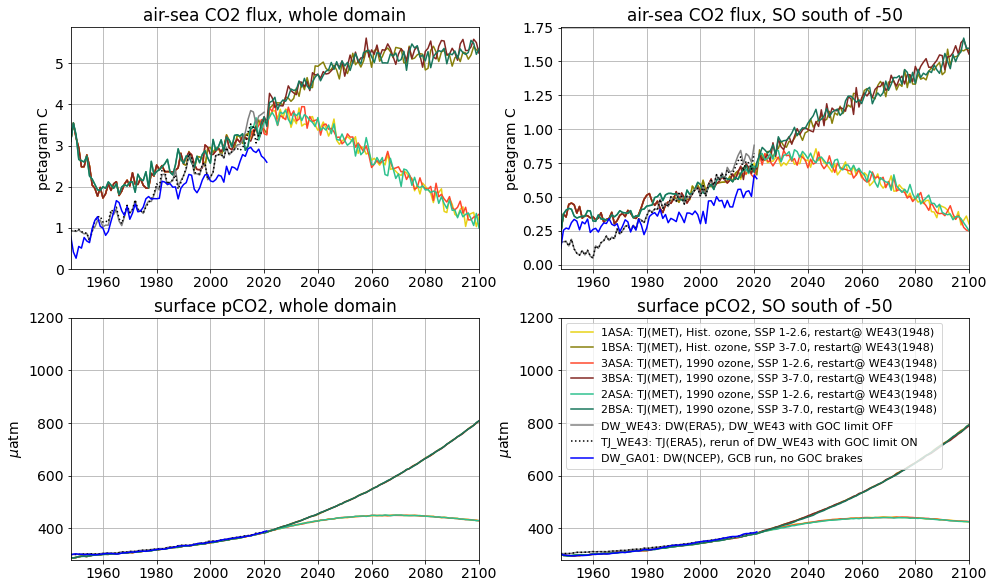

In [22]:
### open the datasets
reload(pr)
if graph:
    dsets = []

    for tm in tms:
        #print(tm)
        w = glob.glob(f'{sdir}*SUMMARY*{tm}*')
        #print(w)
        ds = xr.open_dataset(w[0])
        dsets.append(ds)
    pr.plot_carbon(dsets, cols, descs, linestyles, sdir, fnam, tstart = 1948, tend = 2100, tendatm =1200)


In [ ]:
# ssp1 = '/gpfs/data/greenocean/software/resources/SOZONE_atmo/atmco2_ssp1-26.dat'
# ssp3 = '/gpfs/data/greenocean/software/resources/SOZONE_atmo/atmco2_ssp3-70.dat'
# import pandas as pd
# import numpy as np

# # columns_to_keep = ['#time', 'x-momentum', 'y-momentum', 'mass']
# df1 = pd.read_table(ssp1)
# df3 = pd.read_table(ssp3)

# df3.columns

In [ ]:
# plt.plot(df1['1650.042'],df1['276.58'])
# plt.plot(df3['1650.042'],df3['276.58'])
# plt.xlim([1940,2100])
# plt.ylim([250,1000])
# plt.grid()

In [ ]:
# extract = False #extracting?
# graph = True #plotting?
# sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/' #results directory
# fnam = 'Cflx_spinup_monitor.png' ## filename for resulting plot
# tms = ['TOM12_TJ_SP01']#,'TOM12_TJ_1BS2', 'TOM12_TJ_3AS1','TOM12_DW_WE43', 'TOM12_DW_GA01'] ##models to plot
# tms_te = tms ##models to extract
# descs = ['SPO1: model spinup',
#          'GA01: DW(NCEP), GCB run'] #descriptions of models in tm
# cols = ['brown', sc.scen['1A']['color'],sc.scen['1B']['color'],sc.scen['3A']['color'], 'grey', 'b'] #colours for models in tm

# if extract: 
#     for tm in tms_te:
#         bp.breakdown_maker(tm, bdflag = 'cflx', resDir = sdir)
# linestyles = ['-',':','-',':','-',':','-',':','-']
# ## open the datasets
# if graph:
#     dsets = []

#     for tm in tms:
#         w = glob.glob(f'{sdir}*{tm}*')
#         ds = xr.open_dataset(w[0])
#         dsets.append(ds)
#     pr.plot_carbon(dsets, cols, descs,linestyles, sdir, fnam, tstart = 1700, tend = 2100, tendatm = 450)
